# Importing Files / Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder


In [2]:
data=pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
data.shape

(918, 12)

# Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data['HeartDisease'] = data['HeartDisease'].astype('category')
data['FastingBS'] = data['FastingBS'].astype('category')

In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = data.select_dtypes(include=numerics).columns
numerical_columns

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'], dtype='object')

In [7]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina',
       'ST_Slope', 'HeartDisease'],
      dtype='object')

In [8]:
data.describe().T.style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000


In [9]:
data.describe(include = ['object', 'category']).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
FastingBS,918,2,0,704
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460
HeartDisease,918,2,1,508


# Binary Features (3)

In [10]:
def pie_charts(data, feature, target):
    colors = sns.color_palette('pastel')[0:5]
    fig,axes = plt.subplots(1,2,figsize=(12,8))
    labels = data[feature].unique()
    textprops = {"fontsize":15}

    axes[0].pie(data[data[target]==0][feature].value_counts(),colors=colors, labels=labels,autopct='%1.1f%%',textprops =textprops)
    axes[0].set_title('No {}'.format(target),fontsize=15)
    axes[1].pie(data[data[target]==1][feature].value_counts(),colors=colors, labels=labels,autopct='%1.1f%%',textprops =textprops)
    axes[1].set_title('Yes {}'.format(target),fontsize=15)

    plt.legend(title = feature, fontsize=15, title_fontsize=15)
    plt.show()

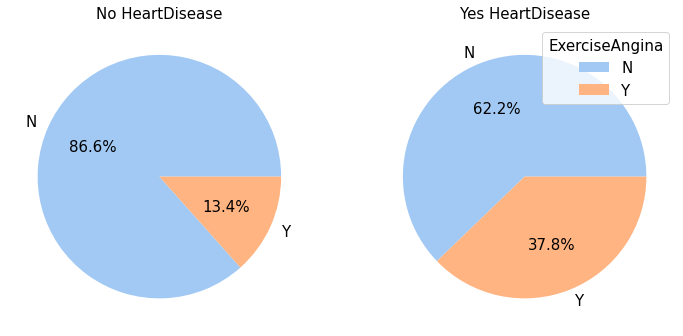

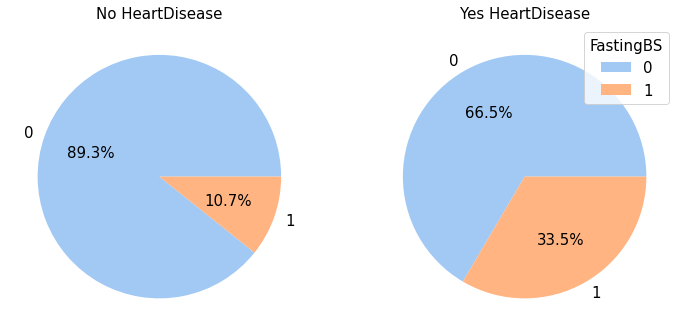

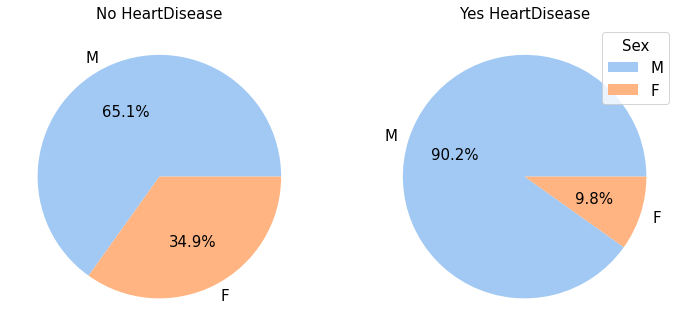

In [11]:
binary_feature = ["ExerciseAngina", "FastingBS", "Sex"]
for feature in binary_feature:
    pie_charts(data,feature,"HeartDisease")

In [12]:
def probability_calculation(feature, feature_values) : 
    
    first_with_heart_disease = len(data[(data['HeartDisease']==1) & (data[feature]==feature_values[0])])
    num_first_value = len(data[data[feature]==feature_values[0]])

    second_with_heart_disease = len(data[(data['HeartDisease']==1) & (data[feature]==feature_values[1])])
    num_second_value = len(data[data[feature]==feature_values[1]])

    print("\n" + feature + " : \n")
    print('👉 Probability of {} : {} to have Heart disease:'.format(feature,feature_values[0]), first_with_heart_disease/num_first_value)
    print('👉 Probability of {} : {} to have Heart disease:'.format(feature,feature_values[1]), second_with_heart_disease/num_second_value)


In [13]:
probability_calculation('Sex', ['M', 'F'])


Sex : 

👉 Probability of Sex : M to have Heart disease: 0.6317241379310344
👉 Probability of Sex : F to have Heart disease: 0.25906735751295334


In [14]:
probability_calculation('ExerciseAngina', ['Y', 'N'])


ExerciseAngina : 

👉 Probability of ExerciseAngina : Y to have Heart disease: 0.8517520215633423
👉 Probability of ExerciseAngina : N to have Heart disease: 0.3510054844606947


In [15]:
probability_calculation("FastingBS", [1,0])


FastingBS : 

👉 Probability of FastingBS : 1 to have Heart disease: 0.794392523364486
👉 Probability of FastingBS : 0 to have Heart disease: 0.48011363636363635


# Multi-class features (3)

In [16]:
def distribution_categorical_features(data, feature, target, colors) :
    sns.set(rc={'figure.figsize':(14,6)},font_scale=1.2)
    grouped_columns = sns.countplot(x=feature, hue=target, data=data,palette=colors)
    grouped_columns.set_title('Countplot for {} {}'.format(target, feature))

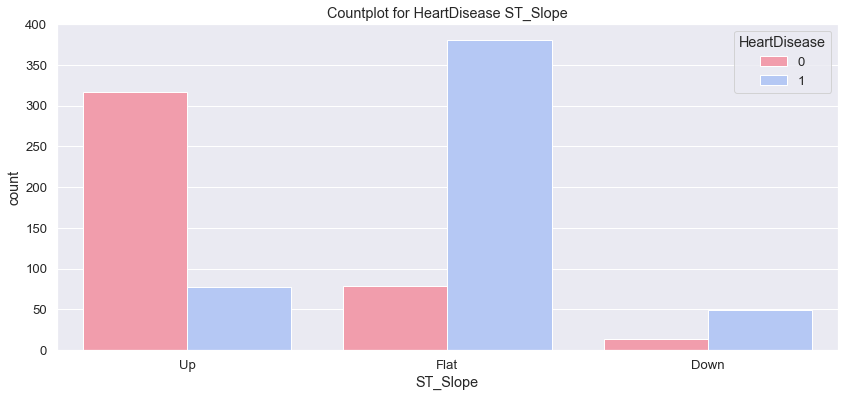

In [17]:
distribution_categorical_features(data, "ST_Slope", "HeartDisease", ["#ff8fa3","#abc4ff"])

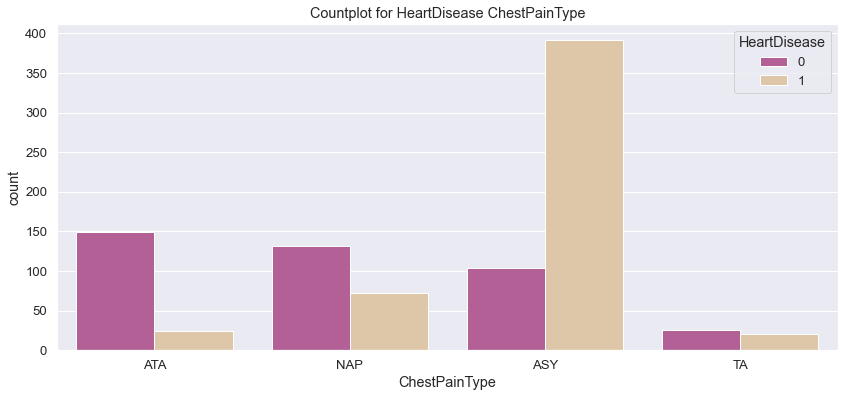

In [18]:
distribution_categorical_features(data, "ChestPainType", "HeartDisease", ["#c05299","#e7c8a0"])

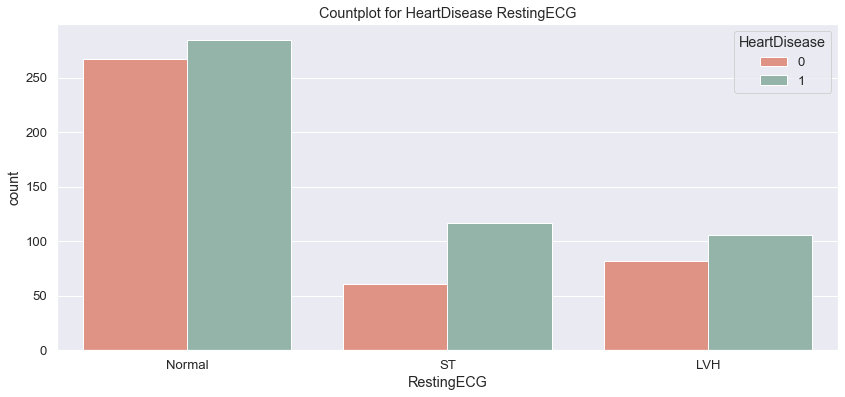

In [19]:
distribution_categorical_features(data, "RestingECG", "HeartDisease", ["#ED8975","#8FB9AA"])

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

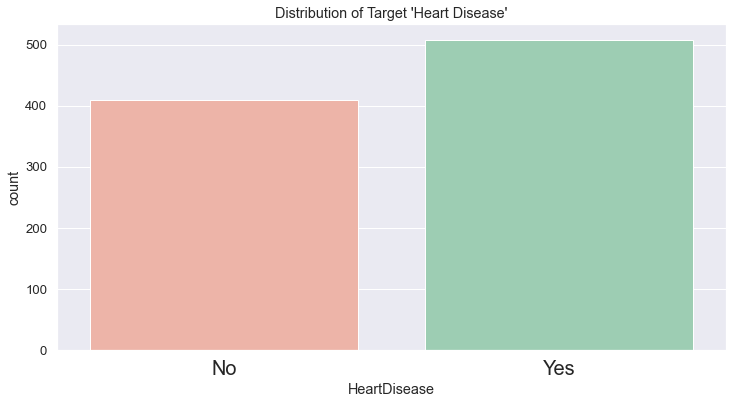

In [20]:
plt.figure(figsize=(12, 6))
heartDisease_countplot = sns.countplot(x=data.HeartDisease,palette=["#f8ad9d","#95d5b2"])
heartDisease_countplot.set_title("Distribution of Target 'Heart Disease'")
heartDisease_countplot.set_xticklabels(['No', 'Yes'], fontsize=20)

# Numerical continous Features (5)

In [21]:
def kde_numerical_features(df,column, target) : 
    fig, ax = plt.subplots(figsize = (13,5))
    sns.kdeplot(df[df[target]==1][column], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
    sns.kdeplot(df[df[target]==0][column], alpha=0.5,shade = True, color="#fccc79", label="NoHeartDisease ", ax = ax)
    plt.title('KDE-Plot of {}'.format(column), fontsize = 18)
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.legend()
    plt.show()

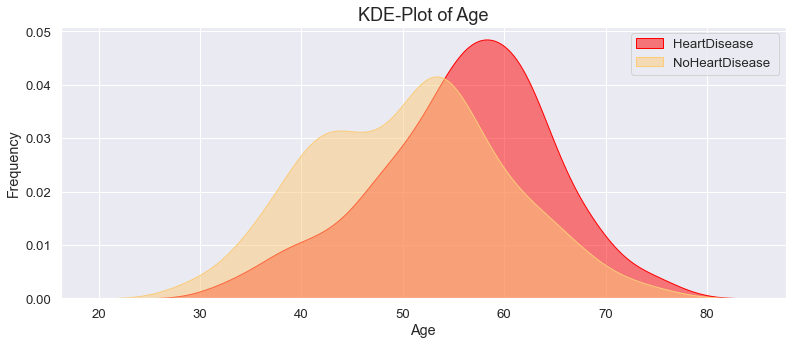

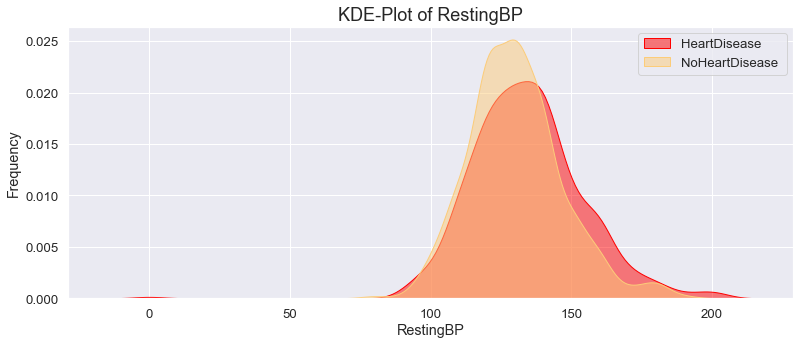

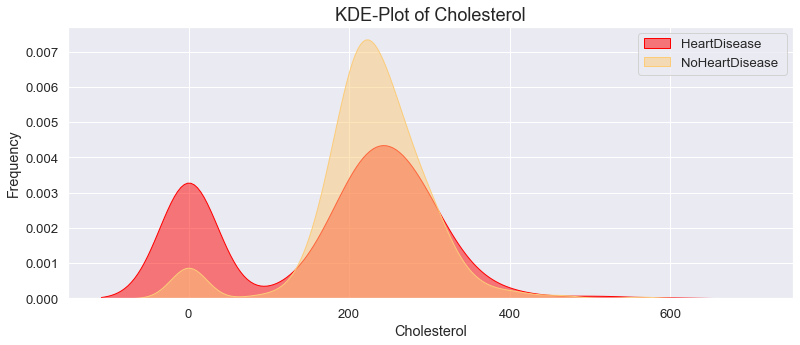

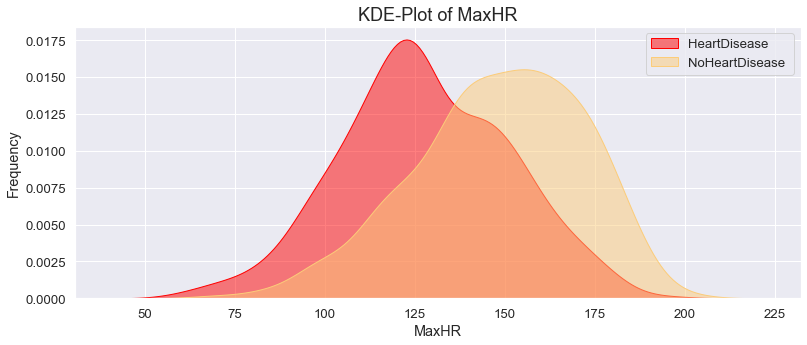

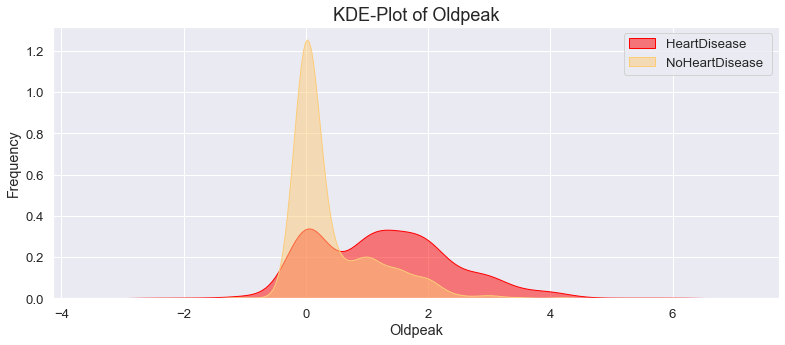

In [22]:
for column in numerical_columns : 
    kde_numerical_features(data,column, 'HeartDisease')

In [23]:
colors = ['lightcoral','deepskyblue',
          'orchid',    'tomato',
          'teal',      'darkcyan',
          'limegreen', 'darkorange']

def distribution_plot(column, title):

    fig = plt.figure(figsize=(16, 6))
    grid = GridSpec(nrows=2, ncols=1, figure=fig)
    color = np.random.choice(colors, 1)[0]

    ax0 = fig.add_subplot(grid[0, :])
    ax0.set_title(f'Histogram and BoxPlot of {title}')
    sns.histplot(column, ax=ax0, color=color)

    ax1 = fig.add_subplot(grid[1, :])
    plt.axis('off')
    sns.boxplot(x=column, ax=ax1, color=color)

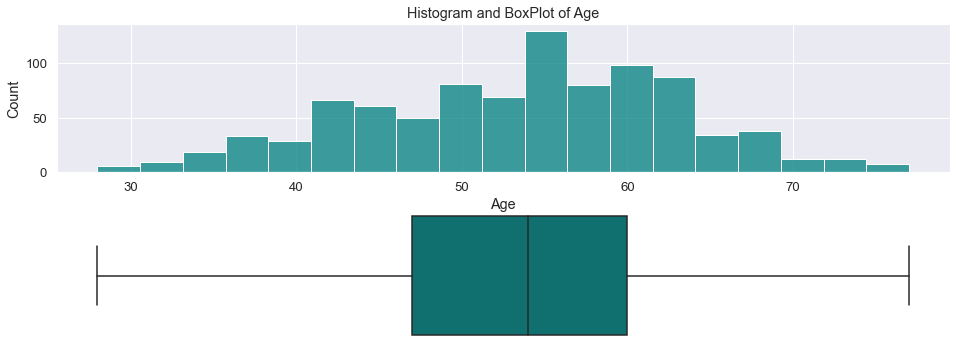

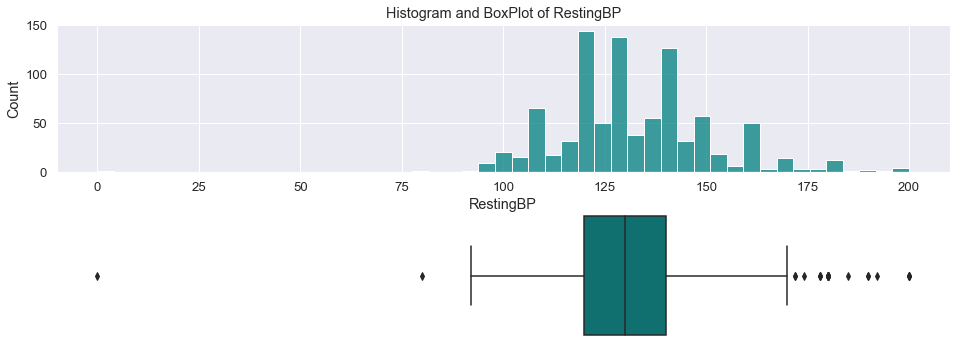

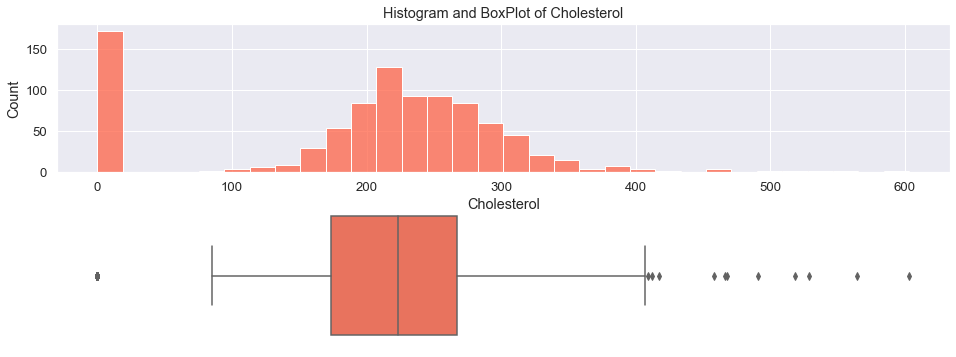

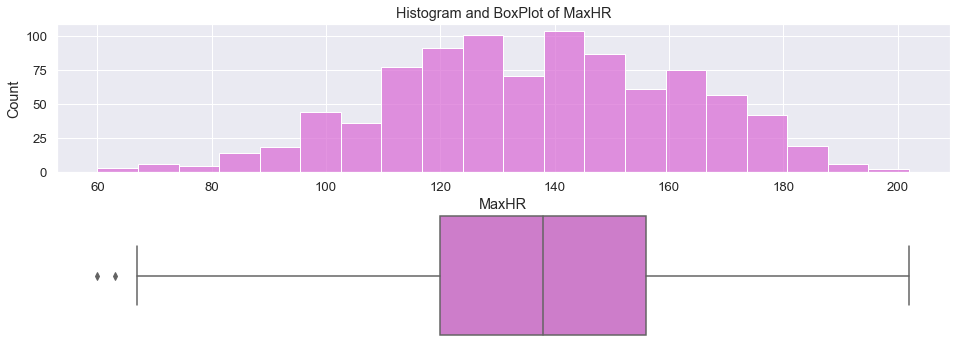

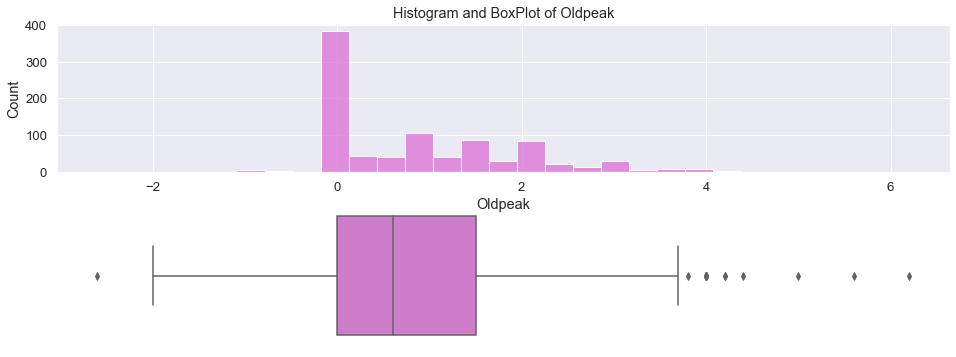

In [24]:
for col in numerical_columns:
    distribution_plot(data[col], col)

[Text(0.5, 1.0, 'All variables correlation heatmap')]

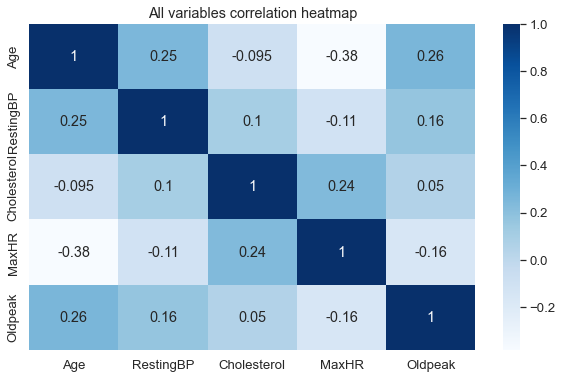

In [25]:
corr=data.corr()
plt.figure(figsize=(10, 6))
ax=sns.heatmap(corr,
            annot=True,cmap='Blues')
ax.set(title="All variables correlation heatmap")

# Pre-processing

In [26]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn import set_config

X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

features_num = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
features_cat = ["Sex", "ChestPainType", "RestingECG", 'FastingBS', "ExerciseAngina", "ST_Slope"]

transformer_num = make_pipeline(StandardScaler())
transformer_cat = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

In [27]:
set_config(display = 'diagram')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'RestingBP', 'Cholesterol', 'MaxHR',
                                  'Oldpeak']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'ChestPainType', 'RestingECG',
                                  'FastingBS', 'ExerciseAngina', 'ST_Slope'])])

In [28]:
X_train, X_val, y_train, y_val = \
    train_test_split(X, y, train_size=0.7)

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
print(X_val.shape)

(276, 21)


# Modelling

In [29]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(max_iter=150).fit(X_train, y_train)
y_pred_1=clf.predict(X_val)
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred_1)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8405797101449275

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_val)
accuracy_score(y_val,y_pred)

0.8369565217391305

In [31]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

KNN.fit(X_train,y_train)
accuracy_score(y_val,KNN.predict(X_val))

0.8405797101449275

In [43]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
knn_gs = GridSearchCV(KNN, param_grid, n_jobs=-1, cv=3)
knn_gs.fit(X_train, y_train)
print('Best parameters found:\n', knn_gs.best_params_)
# accuracy_score(y_val,knn_gs.predict(X_val))

Best parameters found:
 {'n_neighbors': 5}


In [44]:
knn_best_para=KNeighborsClassifier(n_neighbors=5)
knn_best_para.fit(X_train, y_train)
accuracy_score(y_val,knn_best_para.predict(X_val))

0.8405797101449275

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score as acc
model_1 = MLPClassifier(max_iter=150, random_state=1)
model_1.fit(X_train,y_train)
y_pred_1=model_1.predict(X_val)
print(acc(y_pred_1,y_val))

0.8442028985507246


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


In [33]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
clf = GridSearchCV(model_1, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=150, random_state=1),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam', 'lbfgs']})

In [34]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}


In [36]:
model_1_bestpara= MLPClassifier(activation='relu', alpha= 0.05, hidden_layer_sizes= (100,), learning_rate= 'constant', solver= 'adam')
model_1_bestpara.fit(X_train,y_train)
y_pred_1=model_1_bestpara.predict(X_val)
print(acc(y_pred_1,y_val))

0.8586956521739131


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [45]:
from sklearn.svm import SVC
model_2 = SVC()
model_2.fit(X_train, y_train)
 
# print prediction results
predictions = model_2.predict(X_val)
print(acc(y_val, predictions))

0.8478260869565217


In [72]:

from xgboost import XGBClassifier
model_3 = XGBClassifier(learning_rate=0.02, n_estimators=600)
model_3.fit(X_train,y_train)

print(acc(y_val,model_3.predict(X_val)))

0.8405797101449275


In [74]:
params = {
        'learning_rate':[0.001,0.01,0.02,0.05,0.1,0.5,1],
        'n_estimators':[100,200,500,600,1000],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
model_3_bestpara = GridSearchCV(model_3, params, n_jobs=-1, cv=3)
model_3_bestpara.fit(X_train, y_train)
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6}


In [75]:
model_3_bestparam=XGBClassifier(colsample_bytree=0.6,gamma=1.5,max_depth=3,min_child_weight=1,subsample=0.6,learning_rate=0.02, n_estimators=600)
model_3_bestparam.fit(X_train, y_train)
print(acc(y_val,model_3_bestparam.predict(X_val)))

0.8514492753623188
